In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sma
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [78]:
accidents = pd.read_csv("accidents_cleaned.csv")

In [79]:
accidents.date = pd.to_datetime(accidents.date)

In [80]:
accidents['injured'] = accidents['number-of-persons-injured']+accidents['number-of-pedestrians-injured']+\
accidents['number-of-cyclist-injured']+accidents['number-of-motorist-injured']
accidents['killed'] = accidents['number-of-persons-killed']+accidents['number-of-pedestrians-killed']+\
accidents['number-of-cyclist-killed']+accidents['number-of-motorist-killed']

In [81]:
accidents.head()

,Unnamed: 0,date,time,borough,zip-code,latitude,longitude,location,on-street-name,cross-street-name,...,contributing-factor-vehicle-4,contributing-factor-vehicle-5,unique-key,vehicle-type-code-1,vehicle-type-code-2,vehicle-type-code-3,vehicle-type-code-4,vehicle-type-code-5,injured,killed
0,5128,2018-06-23,18:10,NaN,NaN,40.660225,-73.99459,"(40.660225, -73.99459)",23 STREET,NaN,...,NaN,NaN,3927364,Sedan,NaN,NaN,NaN,NaN,0,0
1,5226,2018-06-07,12:00,NaN,NaN,40.762566,-73.81859,"(40.762566, -73.81859)",147 STREET,NaN,...,NaN,NaN,3916039,Sedan,NaN,NaN,NaN,NaN,0,0
2,62906,2018-07-31,0:00,BROOKLYN,11212.0,40.654400,-73.92044,"(40.6544, -73.92044)",LINDEN BOULEVARD,EAST 91 STREET,...,NaN,NaN,3952426,Taxi,Sedan,NaN,NaN,NaN,0,0
3,62907,2018-07-31,0:00,MANHATTAN,10003.0,40.735878,-73.98740,"(40.735878, -73.9874)",IRVING PLACE,EAST 17 STREET,...,NaN,NaN,3952294,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,0,0
4,62908,2018-07-31,0:00,QUEENS,11429.0,40.714653,-73.74274,"(40.714653, -73.74274)",NaN,NaN,...,NaN,NaN,3952997,Sedan,Sedan,NaN,NaN,NaN,0,0


In [82]:
deaths_time = accidents[['killed','date']]
injuries_time = accidents[['injured','date']]

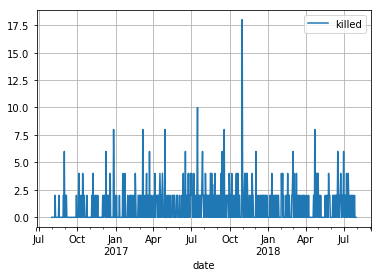

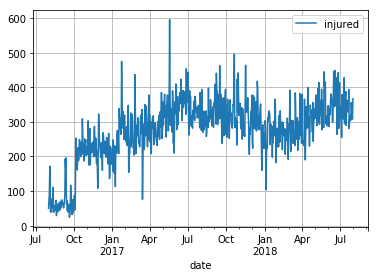

In [83]:
deaths_time = deaths_time.groupby('date').sum()
injuries_time = injuries_time.groupby('date').sum()
plt.figure(figsize=(10,10))
ax1 = deaths_time.plot(grid=True)
ax2 = injuries_time.plot(grid=True)
plt.show()

In [84]:
deaths_time_rol = deaths_time.cumsum()
injuries_time_rol = injuries_time.cumsum()

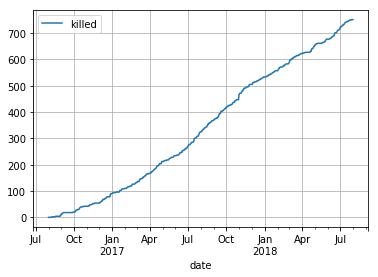

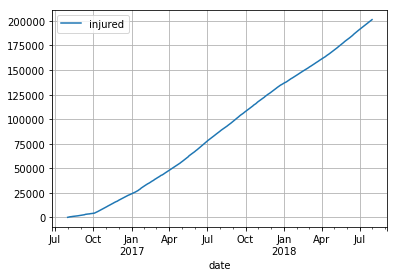

In [85]:
plt.figure(figsize=(10,10))
deaths_time_rol.plot(grid=True)
injuries_time_rol.plot(grid=True)
plt.show()

(array([ 736146.,  736238.,  736330.,  736420.,  736511.,  736603.,
         736695.,  736785.,  736876.]), <a list of 9 Text xticklabel objects>)

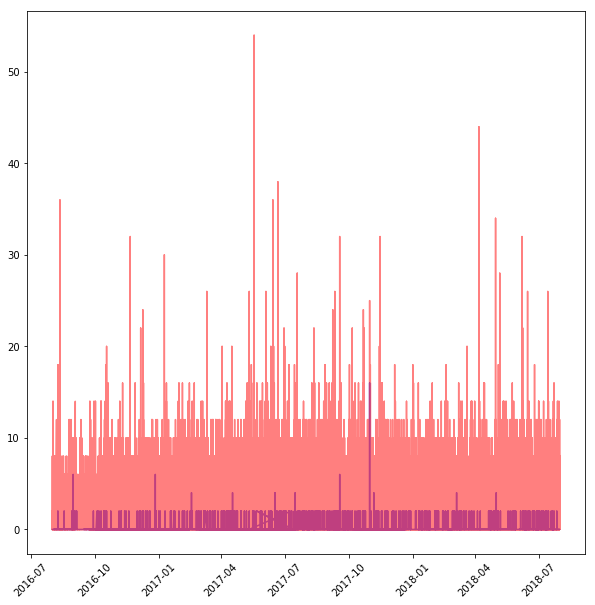

In [86]:
plt.figure(figsize=(10,10))
plt.plot(accidents.date, accidents.killed,color='b',alpha=0.5)
plt.plot(accidents.date, accidents.injured,color='r',alpha=0.5)
plt.xticks(rotation=45)

In [145]:
deaths_time.killed

date
2016-08-01    0
2016-08-02    0
2016-08-03    0
2016-08-04    0
2016-08-05    0
2016-08-06    0
2016-08-07    0
2016-08-08    0
2016-08-09    2
2016-08-10    0
2016-08-11    0
2016-08-12    0
2016-08-13    0
2016-08-14    0
2016-08-15    0
2016-08-16    0
2016-08-17    0
2016-08-18    2
2016-08-19    0
2016-08-20    0
2016-08-21    0
2016-08-22    0
2016-08-23    0
2016-08-24    0
2016-08-25    0
2016-08-26    0
2016-08-27    0
2016-08-28    0
2016-08-29    2
2016-08-30    0
             ..
2018-07-02    0
2018-07-03    2
2018-07-04    0
2018-07-05    2
2018-07-06    2
2018-07-07    0
2018-07-08    4
2018-07-09    0
2018-07-10    0
2018-07-11    2
2018-07-12    4
2018-07-13    2
2018-07-14    0
2018-07-15    2
2018-07-16    0
2018-07-17    0
2018-07-18    0
2018-07-19    2
2018-07-20    0
2018-07-21    2
2018-07-22    0
2018-07-23    2
2018-07-24    0
2018-07-25    0
2018-07-26    0
2018-07-27    2
2018-07-28    0
2018-07-29    0
2018-07-30    0
2018-07-31    0
Name: killed, Lengt

(array([ 736146.,  736238.,  736330.,  736420.,  736511.,  736603.,
         736695.,  736785.,  736876.]), <a list of 9 Text xticklabel objects>)

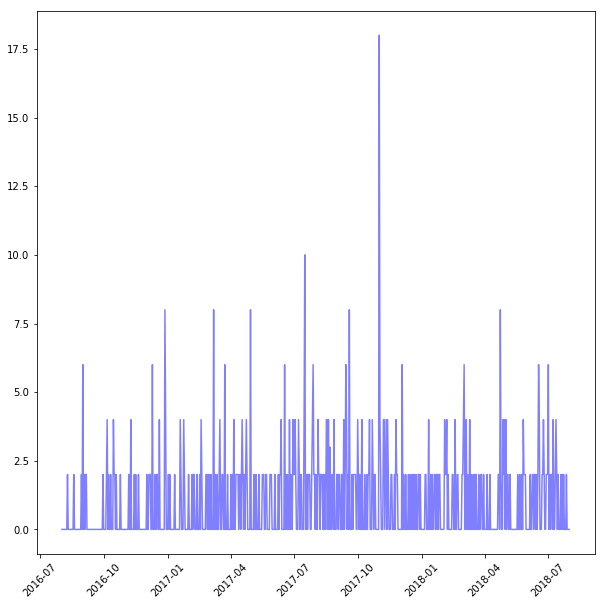

In [144]:
plt.figure(figsize=(10,10))
plt.plot(deaths_time.index, deaths_time.killed,color='b',alpha=0.5)
plt.xticks(rotation=45)

(array([ 736146.,  736238.,  736330.,  736420.,  736511.,  736603.,
         736695.,  736785.,  736876.]), <a list of 9 Text xticklabel objects>)

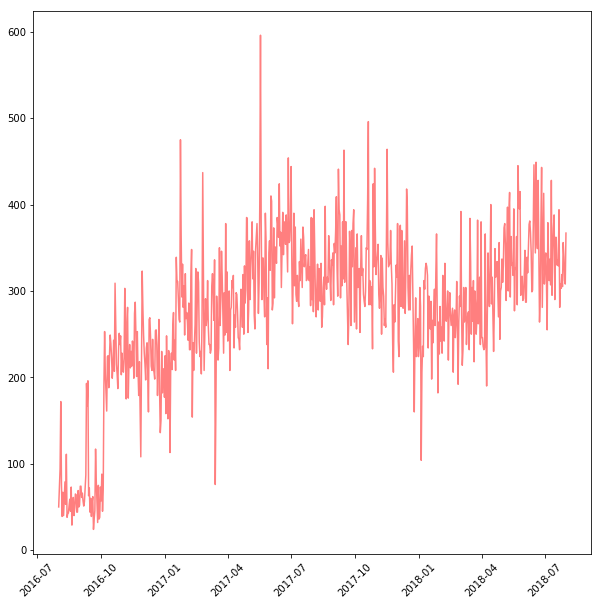

In [143]:
plt.figure(figsize=(10,10))
plt.plot(deaths_time.index, injuries_time.injured,color='r',alpha=0.5)
plt.xticks(rotation=45)

In [87]:
accidents = accidents.set_index('date')

In [146]:
cycle, trend = sma.tsa.filters.hpfilter(injuries_time.injured, lamb = 104976000000)

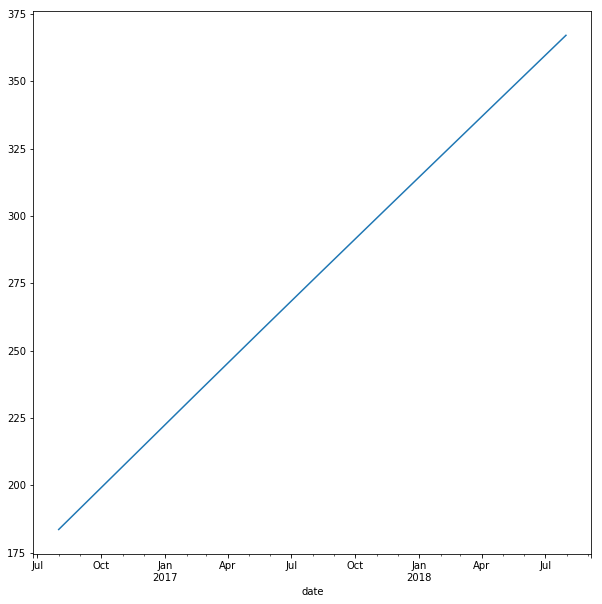

In [147]:
plt.figure(figsize=(10,10))
trend.plot()

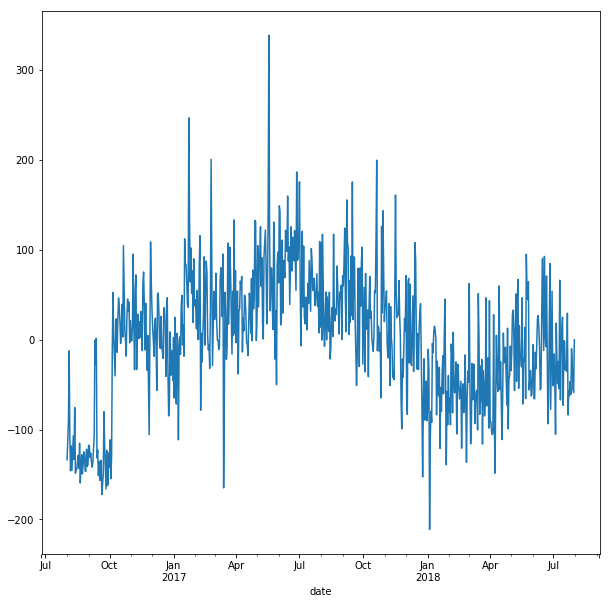

In [148]:
plt.figure(figsize=(10,10))
cycle.plot()

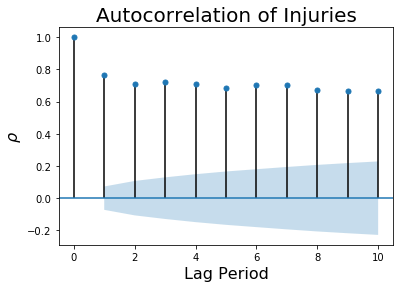

In [139]:
plt.figure(figsize=(10,10))
sma.graphics.tsa.plot_acf(injuries_time.injured.values.squeeze(), lags=10)
plt.title(r'Autocorrelation of Injuries', fontsize=20)
plt.xlabel('Lag Period', fontsize=16)
plt.ylabel(r'$\rho$', fontsize=16)

In [152]:
accidents_count = accidents.sort_index()

In [153]:
accidents_count.reset_index() 

,date,Unnamed: 0,time,borough,zip-code,latitude,longitude,location,on-street-name,cross-street-name,...,contributing-factor-vehicle-4,contributing-factor-vehicle-5,unique-key,vehicle-type-code-1,vehicle-type-code-2,vehicle-type-code-3,vehicle-type-code-4,vehicle-type-code-5,injured,killed
0,2016-08-01,521553,9:10,NaN,NaN,40.734566,-73.722690,"(40.734566, -73.72269)",NaN,NaN,...,NaN,NaN,3492426,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,2,0
1,2016-08-01,521190,15:08,BROOKLYN,11223.0,40.605675,-73.966961,"(40.6056754, -73.9669612)",OCEAN PARKWAY,KINGS HIGHWAY,...,NaN,NaN,3532782,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2,0
2,2016-08-01,521187,15:08,NaN,NaN,40.856626,-73.831893,"(40.8566258, -73.8318929)",NaN,NaN,...,NaN,NaN,3492739,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,0,0
3,2016-08-01,521159,14:40,NaN,NaN,40.870777,-73.819230,"(40.870777, -73.81923)",NaN,NaN,...,NaN,NaN,3492733,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0
4,2016-08-01,521151,14:08,NaN,NaN,40.719762,-73.944758,"(40.7197624, -73.9447576)",NaN,NaN,...,NaN,NaN,3492991,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,0,0
5,2016-08-01,521124,13:50,NaN,NaN,40.661777,-73.850690,"(40.661777, -73.85069)",NaN,NaN,...,NaN,NaN,3620674,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,0,0
6,2016-08-01,521123,13:30,NaN,NaN,40.669220,-73.801094,"(40.66922, -73.801094)",NaN,NaN,...,NaN,NaN,3492525,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,0,0
7,2016-08-01,521122,13:15,NaN,NaN,40.743700,-73.773610,"(40.7437, -73.77361)",NaN,NaN,...,NaN,NaN,3492511,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,0
8,2016-08-01,521115,13:08,NaN,NaN,40.738341,-73.804841,"(40.7383414, -73.8048406)",NaN,NaN,...,NaN,NaN,3493055,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,0
9,2016-08-01,521114,13:08,NaN,NaN,40.696375,-73.979027,"(40.696375, -73.9790268)",NaN,NaN,...,NaN,NaN,3492296,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,0,0


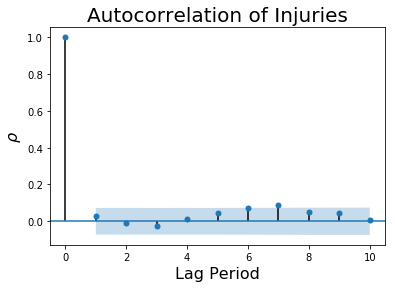

In [140]:
plt.figure(figsize=(10,10))
sma.graphics.tsa.plot_acf(deaths_time.killed.values.squeeze(), lags=10)
plt.title(r'Autocorrelation of Injuries', fontsize=20)
plt.xlabel('Lag Period', fontsize=16)
plt.ylabel(r'$\rho$', fontsize=16)

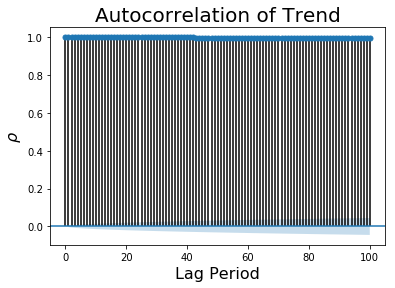

In [93]:
plt.figure(figsize=(10,10))
fig = sma.graphics.tsa.plot_acf(trend.squeeze(), lags=100)
plt.title(r'Autocorrelation of Trend', fontsize=20)
plt.xlabel('Lag Period', fontsize=16)
plt.ylabel(r'$\rho$', fontsize=16)

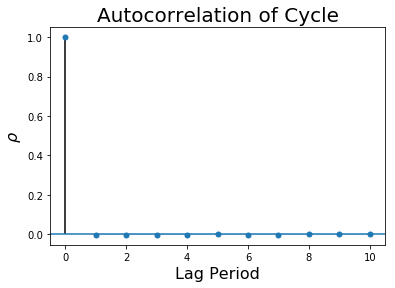

In [94]:
plt.figure(figsize=(10,10))
fig = sma.graphics.tsa.plot_acf(cycle.squeeze(), lags=10)
plt.title(r'Autocorrelation of Cycle', fontsize=20)
plt.xlabel('Lag Period', fontsize=16)
plt.ylabel(r'$\rho$', fontsize=16)

In [95]:
accidents.head()

,Unnamed: 0,time,borough,zip-code,latitude,longitude,location,on-street-name,cross-street-name,off-street-name,...,contributing-factor-vehicle-4,contributing-factor-vehicle-5,unique-key,vehicle-type-code-1,vehicle-type-code-2,vehicle-type-code-3,vehicle-type-code-4,vehicle-type-code-5,injured,killed
date,,,,,,,,,,,,,,,,,,,,,
2018-06-23,5128,18:10,NaN,NaN,40.660225,-73.99459,"(40.660225, -73.99459)",23 STREET,NaN,NaN,...,NaN,NaN,3927364,Sedan,NaN,NaN,NaN,NaN,0,0
2018-06-07,5226,12:00,NaN,NaN,40.762566,-73.81859,"(40.762566, -73.81859)",147 STREET,NaN,NaN,...,NaN,NaN,3916039,Sedan,NaN,NaN,NaN,NaN,0,0
2018-07-31,62906,0:00,BROOKLYN,11212.0,40.654400,-73.92044,"(40.6544, -73.92044)",LINDEN BOULEVARD,EAST 91 STREET,NaN,...,NaN,NaN,3952426,Taxi,Sedan,NaN,NaN,NaN,0,0
2018-07-31,62907,0:00,MANHATTAN,10003.0,40.735878,-73.98740,"(40.735878, -73.9874)",IRVING PLACE,EAST 17 STREET,NaN,...,NaN,NaN,3952294,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,0,0
2018-07-31,62908,0:00,QUEENS,11429.0,40.714653,-73.74274,"(40.714653, -73.74274)",NaN,NaN,216-02 99 AVENUE,...,NaN,NaN,3952997,Sedan,Sedan,NaN,NaN,NaN,0,0


In [96]:
accidents.index.month

Int64Index([6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
            ...
            8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
           dtype='int64', name='date', length=381328)

In [97]:
accidents.head()

,Unnamed: 0,time,borough,zip-code,latitude,longitude,location,on-street-name,cross-street-name,off-street-name,...,contributing-factor-vehicle-4,contributing-factor-vehicle-5,unique-key,vehicle-type-code-1,vehicle-type-code-2,vehicle-type-code-3,vehicle-type-code-4,vehicle-type-code-5,injured,killed
date,,,,,,,,,,,,,,,,,,,,,
2018-06-23,5128,18:10,NaN,NaN,40.660225,-73.99459,"(40.660225, -73.99459)",23 STREET,NaN,NaN,...,NaN,NaN,3927364,Sedan,NaN,NaN,NaN,NaN,0,0
2018-06-07,5226,12:00,NaN,NaN,40.762566,-73.81859,"(40.762566, -73.81859)",147 STREET,NaN,NaN,...,NaN,NaN,3916039,Sedan,NaN,NaN,NaN,NaN,0,0
2018-07-31,62906,0:00,BROOKLYN,11212.0,40.654400,-73.92044,"(40.6544, -73.92044)",LINDEN BOULEVARD,EAST 91 STREET,NaN,...,NaN,NaN,3952426,Taxi,Sedan,NaN,NaN,NaN,0,0
2018-07-31,62907,0:00,MANHATTAN,10003.0,40.735878,-73.98740,"(40.735878, -73.9874)",IRVING PLACE,EAST 17 STREET,NaN,...,NaN,NaN,3952294,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,0,0
2018-07-31,62908,0:00,QUEENS,11429.0,40.714653,-73.74274,"(40.714653, -73.74274)",NaN,NaN,216-02 99 AVENUE,...,NaN,NaN,3952997,Sedan,Sedan,NaN,NaN,NaN,0,0


In [98]:
accidents_y1 = accidents.sort_index()

In [99]:
accidents_y1.head()

,Unnamed: 0,time,borough,zip-code,latitude,longitude,location,on-street-name,cross-street-name,off-street-name,...,contributing-factor-vehicle-4,contributing-factor-vehicle-5,unique-key,vehicle-type-code-1,vehicle-type-code-2,vehicle-type-code-3,vehicle-type-code-4,vehicle-type-code-5,injured,killed
date,,,,,,,,,,,,,,,,,,,,,
2016-08-01,521553,9:10,NaN,NaN,40.734566,-73.722690,"(40.734566, -73.72269)",NaN,NaN,NaN,...,NaN,NaN,3492426,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,2,0
2016-08-01,521190,15:08,BROOKLYN,11223.0,40.605675,-73.966961,"(40.6056754, -73.9669612)",OCEAN PARKWAY,KINGS HIGHWAY,NaN,...,NaN,NaN,3532782,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2,0
2016-08-01,521187,15:08,NaN,NaN,40.856626,-73.831893,"(40.8566258, -73.8318929)",NaN,NaN,NaN,...,NaN,NaN,3492739,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,0,0
2016-08-01,521159,14:40,NaN,NaN,40.870777,-73.819230,"(40.870777, -73.81923)",NaN,NaN,NaN,...,NaN,NaN,3492733,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0
2016-08-01,521151,14:08,NaN,NaN,40.719762,-73.944758,"(40.7197624, -73.9447576)",NaN,NaN,NaN,...,NaN,NaN,3492991,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,0,0


In [100]:
accidents_y1 = accidents_y1.loc['2016-08-01':'2017-07-31']

In [101]:
accidents_y1 = accidents_y1[['injured','killed']]

In [102]:
accidents_y1['date'] = accidents_y1.index

In [103]:
accidents_y1 = accidents_y1.groupby('date').sum()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [104]:
accidents_y1['month'] = accidents_y1.index.month

In [105]:
def season_calc(row):
    if row.month <4:
        val = 'winter'
    elif (row.month >=4 and row.month<6):
        val = 'spring'
    elif (row.month >=6 and row.month<9):
        val = 'summer'
    elif (row.month >=9 and row.month<12):
        val = 'fall'
    else :
        val = 'winter'
    return val

In [106]:
accidents_y1['season'] = accidents_y1.apply(season_calc,axis=1)

In [107]:
accidents_y1.head()

,injured,killed,month,season
date,,,,
2016-08-01,50,0,8,summer
2016-08-02,71,0,8,summer
2016-08-03,94,0,8,summer
2016-08-04,172,0,8,summer
2016-08-05,76,0,8,summer


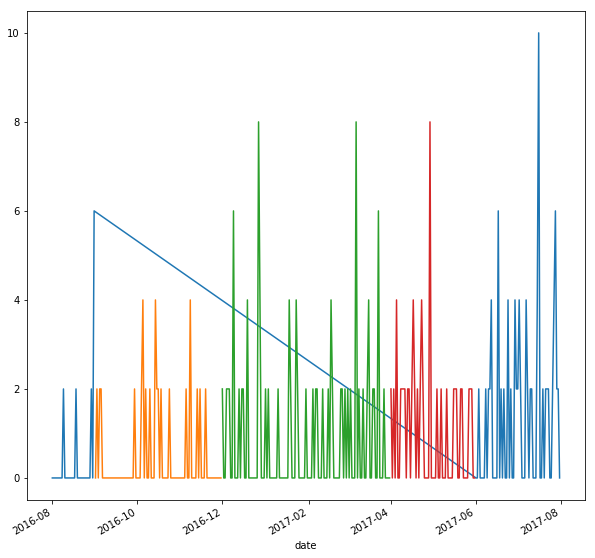

In [108]:
plt.figure(figsize=(10,10))
accidents_y1[accidents_y1.season == 'summer'].killed.plot()
accidents_y1[accidents_y1.season == 'fall'].killed.plot()
accidents_y1[accidents_y1.season == 'winter'].killed.plot()
accidents_y1[accidents_y1.season == 'spring'].killed.plot()

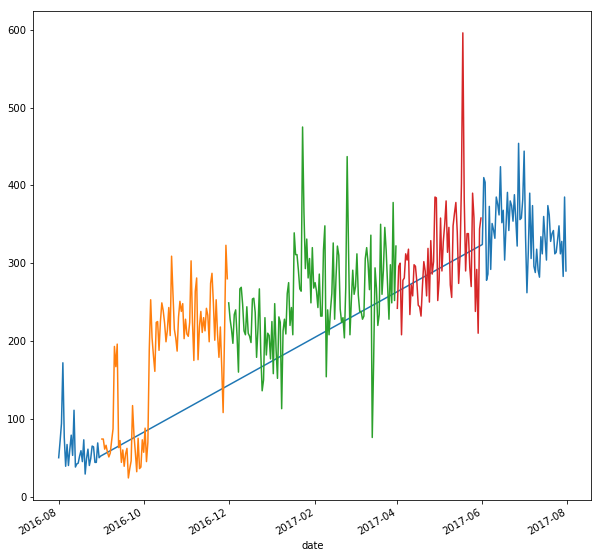

In [109]:
plt.figure(figsize=(10,10))
accidents_y1[accidents_y1.season == 'summer'].injured.plot()
accidents_y1[accidents_y1.season == 'fall'].injured.plot()
accidents_y1[accidents_y1.season == 'winter'].injured.plot()
accidents_y1[accidents_y1.season == 'spring'].injured.plot()

In [110]:
accidents_y2 = accidents.sort_index()

In [111]:
accidents_y2.head()

,Unnamed: 0,time,borough,zip-code,latitude,longitude,location,on-street-name,cross-street-name,off-street-name,...,contributing-factor-vehicle-4,contributing-factor-vehicle-5,unique-key,vehicle-type-code-1,vehicle-type-code-2,vehicle-type-code-3,vehicle-type-code-4,vehicle-type-code-5,injured,killed
date,,,,,,,,,,,,,,,,,,,,,
2016-08-01,521553,9:10,NaN,NaN,40.734566,-73.722690,"(40.734566, -73.72269)",NaN,NaN,NaN,...,NaN,NaN,3492426,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,2,0
2016-08-01,521190,15:08,BROOKLYN,11223.0,40.605675,-73.966961,"(40.6056754, -73.9669612)",OCEAN PARKWAY,KINGS HIGHWAY,NaN,...,NaN,NaN,3532782,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2,0
2016-08-01,521187,15:08,NaN,NaN,40.856626,-73.831893,"(40.8566258, -73.8318929)",NaN,NaN,NaN,...,NaN,NaN,3492739,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,0,0
2016-08-01,521159,14:40,NaN,NaN,40.870777,-73.819230,"(40.870777, -73.81923)",NaN,NaN,NaN,...,NaN,NaN,3492733,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0
2016-08-01,521151,14:08,NaN,NaN,40.719762,-73.944758,"(40.7197624, -73.9447576)",NaN,NaN,NaN,...,NaN,NaN,3492991,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,0,0


In [112]:
accidents_y2 = accidents_y2.loc['2017-08-01':'2018-07-31']

In [113]:
accidents_y2 = accidents_y2[['injured','killed']]

In [114]:
accidents_y2['date'] = accidents_y2.index

In [115]:
accidents_y2 = accidents_y2.groupby('date').sum()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [116]:
accidents_y2['month'] = accidents_y2.index.month

In [117]:
def season_calc(row):
    if row.month <4:
        val = 'winter'
    elif (row.month >=4 and row.month<6):
        val = 'spring'
    elif (row.month >=6 and row.month<9):
        val = 'summer'
    elif (row.month >=9 and row.month<12):
        val = 'fall'
    else :
        val = 'winter'
    return val

In [118]:
accidents_y2['season'] = accidents_y2.apply(season_calc,axis=1)

In [119]:
accidents_y2.head()

,injured,killed,month,season
date,,,,
2017-08-01,384,2,8,summer
2017-08-02,276,0,8,summer
2017-08-03,394,0,8,summer
2017-08-04,346,4,8,summer
2017-08-05,288,2,8,summer


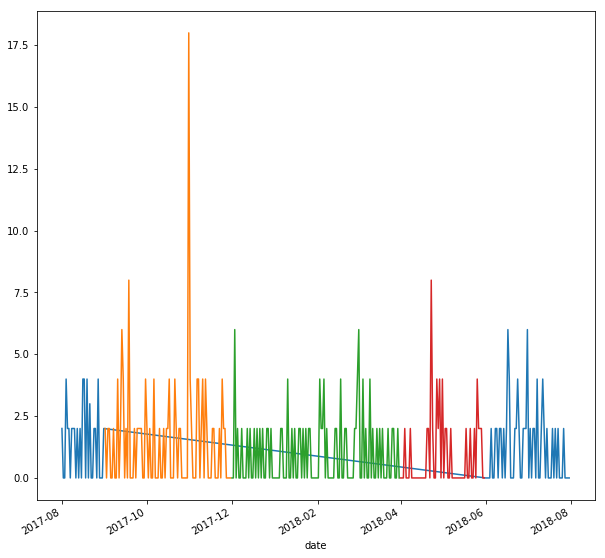

In [120]:
plt.figure(figsize=(10,10))
accidents_y2[accidents_y2.season == 'summer'].killed.plot()
accidents_y2[accidents_y2.season == 'fall'].killed.plot()
accidents_y2[accidents_y2.season == 'winter'].killed.plot()
accidents_y2[accidents_y2.season == 'spring'].killed.plot()

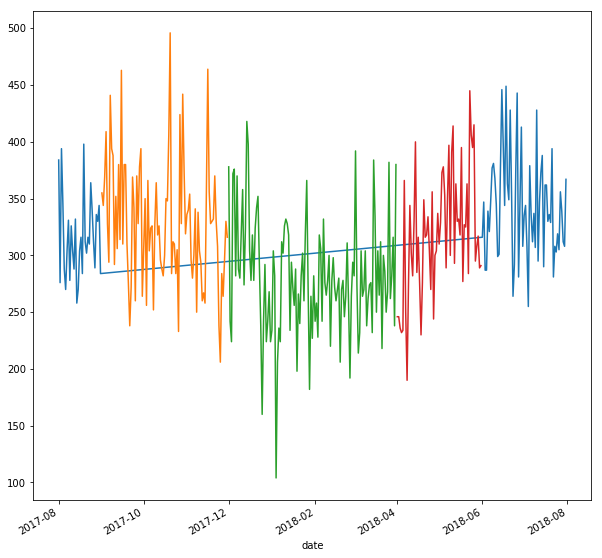

In [121]:
plt.figure(figsize=(10,10))
accidents_y2[accidents_y2.season == 'summer'].injured.plot()
accidents_y2[accidents_y2.season == 'fall'].injured.plot()
accidents_y2[accidents_y2.season == 'winter'].injured.plot()
accidents_y2[accidents_y2.season == 'spring'].injured.plot()

In [122]:
accidents_y1_seasons = accidents_y1.groupby('season').sum()

In [123]:
accidents_y1_seasons

,injured,killed,month
season,,,
fall,15222,42,910
spring,18808,68,275
summer,22839,102,645
winter,30575,112,552


In [124]:
accidents_y2_seasons = accidents_y2.groupby('season').sum()

In [125]:
accidents_y2_seasons

,injured,killed,month
season,,,
fall,29829,136,910
spring,19399,54,275
summer,30681,119,645
winter,33948,118,552


In [126]:
accidents_y1_seasons['season'] = accidents_y1_seasons.index
accidents_y2_seasons['season'] = accidents_y2_seasons.index

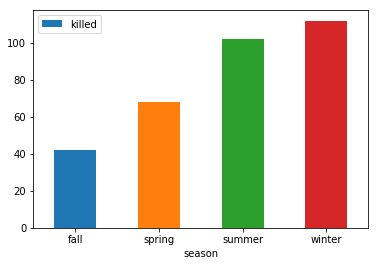

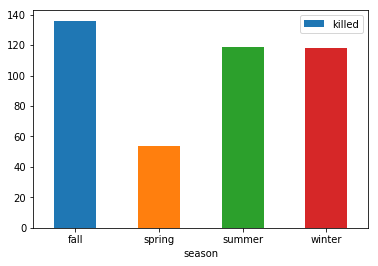

In [127]:
plt.figure(figsize=(10,10))
accidents_y1_seasons.plot.bar(x='season', y='killed', rot=0)
accidents_y2_seasons.plot.bar(x='season', y='killed', rot=0)

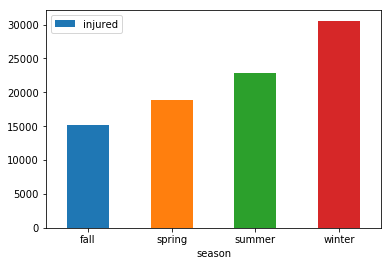

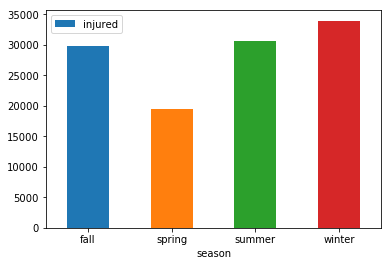

In [128]:
plt.figure(figsize=(10,10))
accidents_y1_seasons.plot.bar(x='season', y='injured', rot=0)
accidents_y2_seasons.plot.bar(x='season', y='injured', rot=0)

In [129]:
def changeFinder(data):

    n = len(data)
    datamean = data.mean()
    datasqmean = (data**2).mean()
    fac = datasqmean - datamean**2
    
    datacsum = data.cumsum()
    datasum = datacsum[-1]

    ppoc = np.zeros(n) #container for point of change relative prob

    #online (iterative) search for point of change
    for m in range(n-1):
        pos = m + 1
        relativePosition = (pos) * (n - pos)
 
        Q = datacsum[m] - (datasum - datacsum[m]) #cumsum up to m - cumsum after
        
        U = -(datamean * (n - 2 * pos) + Q)**2 / (4.0 * relativePosition) + fac
       
        ppoc[m+1] = (-(n * 0.5 - 1) * np.log(n * U * 0.5) - 
                 0.5 * np.log(relativePosition))

    ppoc[0] = min(ppoc[1:])
    changePoint = np.argmax(ppoc)
    
    return {'pChange': ppoc, 
            'pointOfChange': changePoint + 1,
            'meanBefore': (data[:changePoint+1]).mean(), 
            'meanAfter': (data[(changePoint+1):]).mean()}

In [136]:
pochange = changeFinder(deaths_time.killed)
pochange['pointOfChange']

126

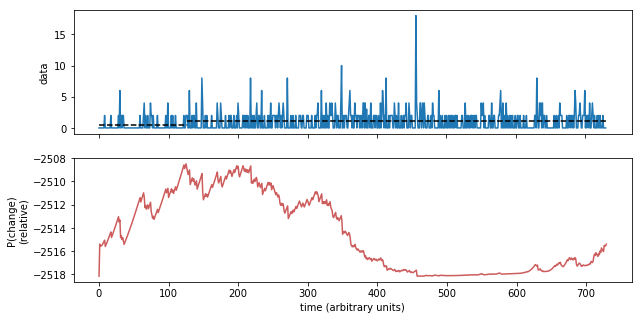

In [137]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(211)
ax1.plot(range(len(deaths_time.killed)), deaths_time.killed)
ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel("data")

ax2 = plt.subplot(212)
ax2.plot(range(len(deaths_time.killed)), 
        pochange['pChange'], color="IndianRed")
ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'k--')
ax1.plot([pochange['pointOfChange'],len(deaths_time.killed)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'k--')
ax2.set_ylabel("P(change)\n(relative)")
ax2.set_xlabel("time (arbitrary units)")

In [132]:
pochange = changeFinder(injuries_time.injured)
pochange['pointOfChange']

66

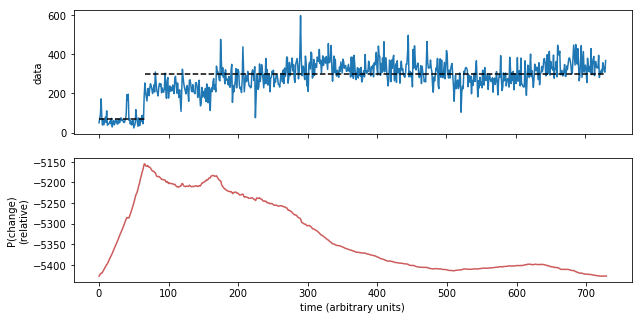

In [133]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(211)
ax1.plot(range(len(injuries_time.injured)), injuries_time.injured)
ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel("data")

ax2 = plt.subplot(212)
ax2.plot(range(len(injuries_time.injured)), 
        pochange['pChange'], color="IndianRed")
ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'k--')
ax1.plot([pochange['pointOfChange'],len(injuries_time.injured)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'k--')
ax2.set_ylabel("P(change)\n(relative)")
ax2.set_xlabel("time (arbitrary units)")

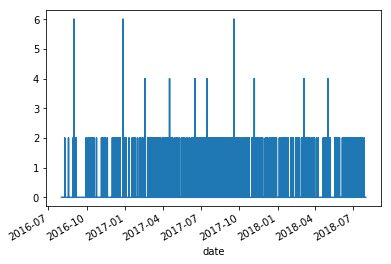

In [64]:
accidents.killed[accidents.killed<15].plot()

In [93]:
pochange['pChange'].argsort()[::-1]

array([375556, 375540, 375555, ..., 198806, 198807,      0])

In [85]:
accidents_time = accidents

In [86]:
accidents_time['hour'] = pd.to_datetime(accidents.time).dt.hour

In [89]:
accidents_time = accidents_time.groupby('hour').sum()

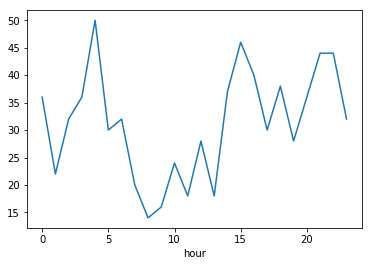

In [91]:
accidents_time.killed.plot()

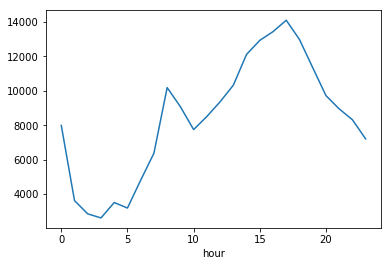

In [92]:
accidents_time.injured.plot()